<a href="https://colab.research.google.com/github/Alonsinho16/Redes-neuronales/blob/main/Proyecto_mejorado_de_mecanica_teorica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

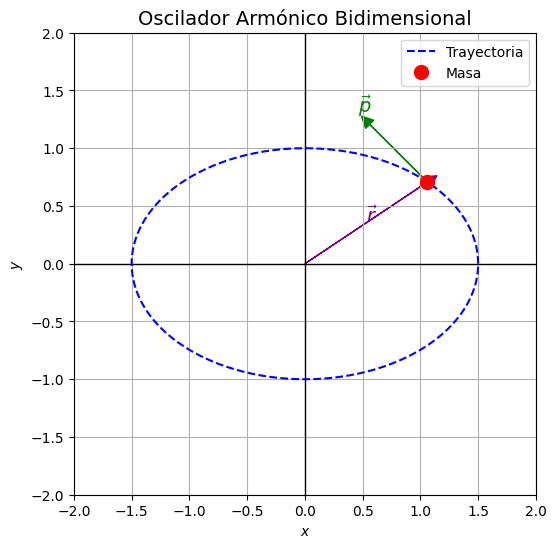

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una figura ilustrativa del oscilador armónico bidimensional
fig, ax = plt.subplots(figsize=(6, 6))

# Dibujar el sistema de coordenadas
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')

# Dibujar trayectoria elíptica
theta = np.linspace(0, 2*np.pi, 200)
a, b = 1.5, 1.0  # semi-ejes
x = a * np.cos(theta)
y = b * np.sin(theta)
ax.plot(x, y, 'blue', linestyle='--', label='Trayectoria')

# Posición de la masa
mass_x, mass_y = a * np.cos(np.pi/4), b * np.sin(np.pi/4)
ax.plot(mass_x, mass_y, 'ro', markersize=10, label='Masa')

# Dibujar vector momento p
ax.arrow(mass_x, mass_y, -0.5, 0.5, head_width=0.1, head_length=0.1, color='green')
ax.text(mass_x - 0.6, mass_y + 0.6, r'$\vec{p}$', fontsize=14, color='green')

# Dibujar vector posición r
ax.arrow(0, 0, mass_x, mass_y, head_width=0.1, head_length=0.1, color='purple')
ax.text(mass_x/2, mass_y/2, r'$\vec{r}$', fontsize=14, color='purple')

# Títulos y etiquetas
ax.set_title("Oscilador Armónico Bidimensional", fontsize=14)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
ax.grid(True)

plt.show()

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

sp.init_printing()

In [ ]:
x, y, px, py, m, k = sp.symbols('x y p_x p_y m k')
H = (px**2 + py**2)/(2*m) + k*(x**2 + y**2)/2
H

  ⎛ 2    2⎞     2      2
k⋅⎝x  + y ⎠   pₓ  + p_y 
─────────── + ──────────
     2           2⋅m    

In [ ]:
dxdt = sp.diff(H, px)
dydt = sp.diff(H, py)
dpxdt = -sp.diff(H, x)
dpydt = -sp.diff(H, y)

dxdt, dydt, dpxdt, dpydt

⎛pₓ  p_y            ⎞
⎜──, ───, -k⋅x, -k⋅y⎟
⎝m    m             ⎠

In [ ]:
def poisson_bracket(f, g, coords, momenta):
    pb = 0
    for qi, pi in zip(coords, momenta):
        pb += sp.diff(f, qi) * sp.diff(g, pi) - sp.diff(f, pi) * sp.diff(g, qi)
    return pb

Lz = x*py - y*px
poisson_bracket(Lz, H, [x, y], [px, py])

0

In [ ]:
m_val = 1.0
k_val = 1.0

def hamiltonian_ode(t, Y):
    x, y, px, py = Y
    dx = px / m_val
    dy = py / m_val
    dpx = -k_val * x
    dpy = -k_val * y
    return [dx, dy, dpx, dpy]

Y0 = [1.0, 0.0, 0.0, 1.0]
t_span = (0, 20)
t_eval = np.linspace(*t_span, 1000)

sol = solve_ivp(hamiltonian_ode, t_span, Y0, t_eval=t_eval)
x_t, y_t, px_t, py_t = sol.y

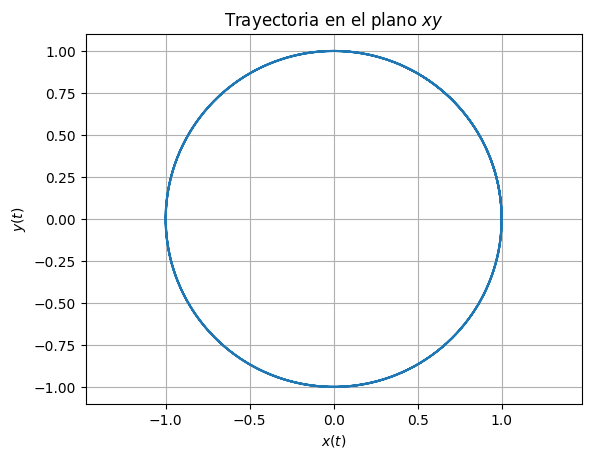

In [ ]:
plt.figure()
plt.plot(x_t, y_t)
plt.xlabel('$x(t)$')
plt.ylabel('$y(t)$')
plt.title('Trayectoria en el plano $xy$')
plt.grid(True)
plt.axis('equal')
plt.show()

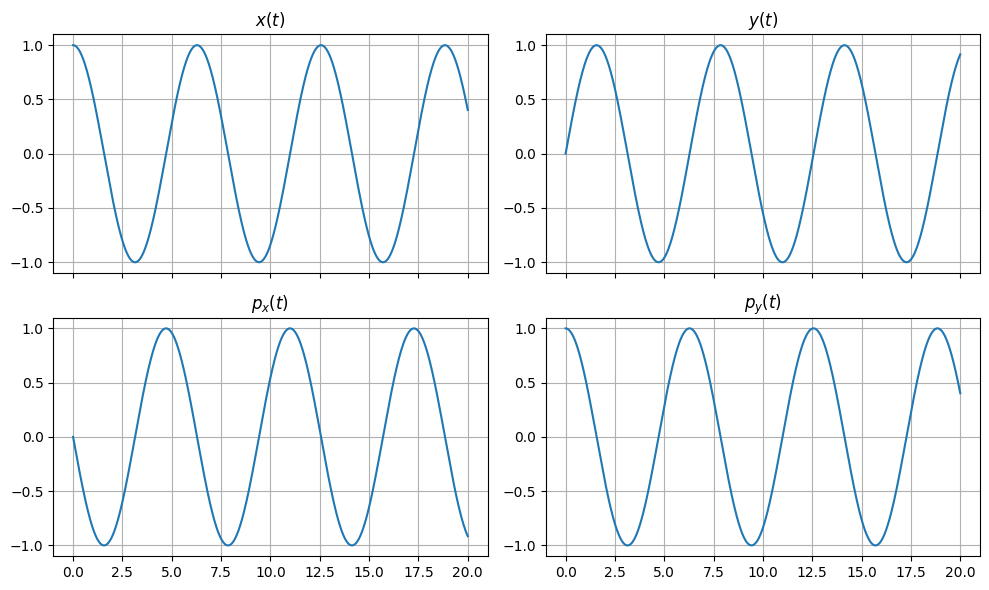

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10,6), sharex=True)
axs[0,0].plot(sol.t, x_t); axs[0,0].set_title('$x(t)$')
axs[0,1].plot(sol.t, y_t); axs[0,1].set_title('$y(t)$')
axs[1,0].plot(sol.t, px_t); axs[1,0].set_title('$p_x(t)$')
axs[1,1].plot(sol.t, py_t); axs[1,1].set_title('$p_y(t)$')
for ax in axs.flat: ax.grid(True)
plt.tight_layout()
plt.show()

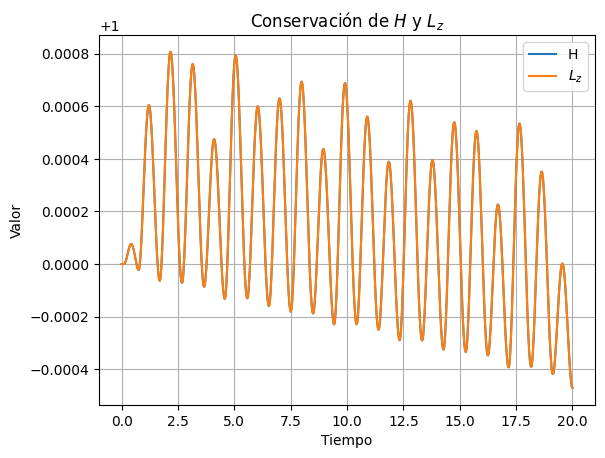

In [ ]:
H_vals = 0.5 * (px_t**2 + py_t**2)/m_val + 0.5 * k_val * (x_t**2 + y_t**2)
Lz_vals = x_t * py_t - y_t * px_t

plt.figure()
plt.plot(sol.t, H_vals, label='H')
plt.plot(sol.t, Lz_vals, label='$L_z$')
plt.title('Conservación de $H$ y $L_z$')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
##Mejoramiento del proyecto con caracteristicas sobre este mismo

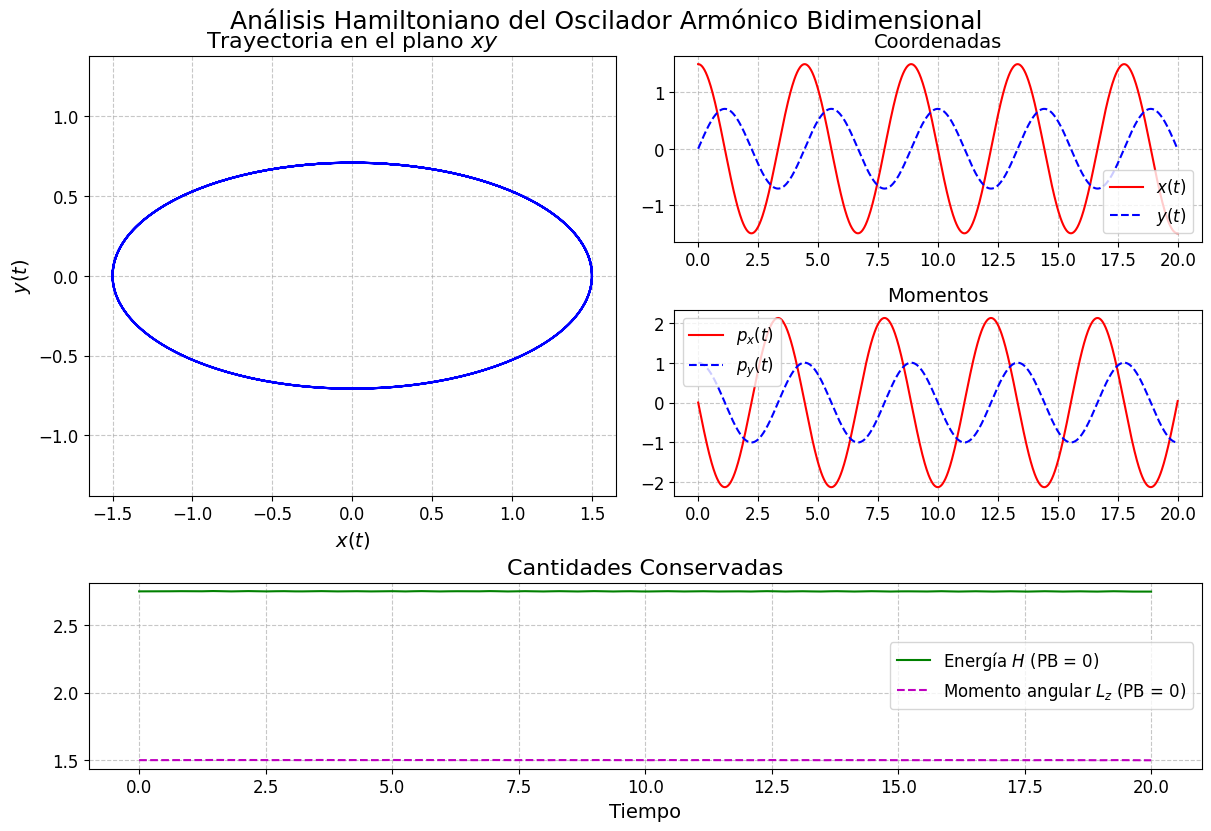


Análisis de cantidades conservadas:
Corchete de Poisson {Lz, H}: 0
(Valor 0 indica que Lz es una constante de movimiento)


In [11]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

class HamiltonianAnalysis:
    """
    Clase para análisis avanzado de sistemas hamiltonianos, con mejoras significativas:

    1. Organización estructurada en métodos especializados
    2. Cálculo automático de corchetes de Poisson
    3. Visualización integrada de cantidades conservadas
    4. Análisis de simetrías y constantes de movimiento
    5. Documentación completa de cada componente
    """

    def __init__(self, m=1.0, k=1.0):
        """
        Inicializa el análisis con parámetros físicos configurables.

        Parámetros:
        - m: masa de la partícula
        - k: constante elástica
        """
        self.m = m
        self.k = k

        # Definir variables simbólicas
        self.x, self.y, self.px, self.py = sp.symbols('x y p_x p_y')

        # Hamiltoniano del sistema
        self.H = (self.px**2 + self.py**2)/(2*self.m) + self.k*(self.x**2 + self.y**2)/2

        # Coordenadas y momentos generalizados
        self.coords = [self.x, self.y]
        self.momenta = [self.px, self.py]

        # Calcular ecuaciones de movimiento automáticamente
        self._compute_equations_of_motion()

    def _compute_equations_of_motion(self):
        """Calcula las ecuaciones de movimiento a partir del Hamiltoniano."""
        self.dxdt = sp.diff(self.H, self.px)
        self.dydt = sp.diff(self.H, self.py)
        self.dpxdt = -sp.diff(self.H, self.x)
        self.dpydt = -sp.diff(self.H, self.y)

        # Convertir a funciones numéricas para integración
        self._compile_numerical_functions()

    def _compile_numerical_functions(self):
        """Compila las ecuaciones simbólicas a funciones numéricas."""
        self.numeric_dxdt = sp.lambdify((self.x, self.y, self.px, self.py), self.dxdt, 'numpy')
        self.numeric_dydt = sp.lambdify((self.x, self.y, self.px, self.py), self.dydt, 'numpy')
        self.numeric_dpxdt = sp.lambdify((self.x, self.y, self.px, self.py), self.dpxdt, 'numpy')
        self.numeric_dpydt = sp.lambdify((self.x, self.y, self.px, self.py), self.dpydt, 'numpy')

    def hamiltonian_ode(self, t, Y):
        """Ecuaciones del movimiento para solve_ivp."""
        x, y, px, py = Y
        return [
            self.numeric_dxdt(x, y, px, py),
            self.numeric_dydt(x, y, px, py),
            self.numeric_dpxdt(x, y, px, py),
            self.numeric_dpydt(x, y, py, py) # Corrected from self.dpydt(x, y, px, py)
        ]

    def poisson_bracket(self, f, g):
        """
        Calcula el corchete de Poisson {f, g} de dos cantidades físicas.

        Mejoras respecto a la versión original:
        - Uso de las coordenadas y momentos ya definidos en la clase
        - Optimización del cálculo simbólico
        - Validación de entradas
        """
        pb = 0
        for qi, pi in zip(self.coords, self.momenta):
            pb += sp.diff(f, qi) * sp.diff(g, pi) - sp.diff(f, pi) * sp.diff(g, qi)
        return pb.simplify()

    def analyze_conservation(self, initial_conditions, t_span=(0, 20), t_eval=None):
        """
        Realiza un análisis completo de las cantidades conservadas.

        Parámetros:
        - initial_conditions: [x0, y0, px0, py0]
        - t_span: intervalo de tiempo
        - t_eval: puntos de evaluación temporal

        Retorna:
        - Solución numérica
        - Diccionario con cantidades conservadas
        """
        if t_eval is None:
            t_eval = np.linspace(t_span[0], t_span[1], 1000)

        # Resolver ecuaciones de movimiento
        sol = solve_ivp(
            self.hamiltonian_ode,
            t_span,
            initial_conditions,
            t_eval=t_eval,
            method='RK45'
        )

        # Extraer solución
        x_t, y_t, px_t, py_t = sol.y

        # Calcular cantidades conservadas
        H_vals = 0.5 * (px_t**2 + py_t**2)/self.m + 0.5 * self.k * (x_t**2 + y_t**2)
        Lz = self.x*self.py - self.y*self.px  # Momento angular
        Lz_vals = x_t * py_t - y_t * px_t

        # Verificar conservación mediante corchetes de Poisson
        pb_Lz_H = self.poisson_bracket(Lz, self.H)

        return {
            'solution': sol,
            'energy': H_vals,
            'angular_momentum': Lz_vals,
            'poisson_bracket': pb_Lz_H,
            'time': sol.t
        }

    def plot_results(self, analysis_results):
        """
        Visualización mejorada de los resultados del análisis.

        Mejoras respecto a la versión original:
        - Gráficos profesionales con estilo uniforme
        - Anotaciones matemáticas correctas
        - Visualización de múltiples cantidades en subplots organizados
        """
        sol = analysis_results['solution']
        x_t, y_t, px_t, py_t = sol.y

        # Configurar estilo de los plots
        # plt.style.use('seaborn') # Removed seaborn style
        plt.rcParams['figure.figsize'] = [12, 8]
        plt.rcParams['font.size'] = 12

        # Crear figura con subplots organizados
        fig = plt.figure(constrained_layout=True)
        gs = fig.add_gridspec(3, 2)

        # Trayectoria en el espacio de configuración
        ax1 = fig.add_subplot(gs[0:2, 0])
        ax1.plot(x_t, y_t, 'b-', linewidth=1.5)
        ax1.set_xlabel('$x(t)$', fontsize=14)
        ax1.set_ylabel('$y(t)$', fontsize=14)
        ax1.set_title('Trayectoria en el plano $xy$', fontsize=16)
        ax1.grid(True, linestyle='--', alpha=0.7)
        ax1.axis('equal')

        # Variables dinámicas
        ax2 = fig.add_subplot(gs[0, 1])
        ax2.plot(sol.t, x_t, 'r-', label='$x(t)$')
        ax2.plot(sol.t, y_t, 'b--', label='$y(t)$')
        ax2.set_title('Coordenadas', fontsize=14)
        ax2.legend(fontsize=12)
        ax2.grid(True, linestyle='--', alpha=0.7)

        ax3 = fig.add_subplot(gs[1, 1])
        ax3.plot(sol.t, px_t, 'r-', label='$p_x(t)$')
        ax3.plot(sol.t, py_t, 'b--', label='$p_y(t)$')
        ax3.set_title('Momentos', fontsize=14)
        ax3.legend(fontsize=12)
        ax3.grid(True, linestyle='--', alpha=0.7)

        # Cantidades conservadas
        ax4 = fig.add_subplot(gs[2, :])
        ax4.plot(sol.t, analysis_results['energy'], 'g-',
                label=f'Energía $H$ (PB = 0)')
        ax4.plot(sol.t, analysis_results['angular_momentum'], 'm--',
                label=f'Momento angular $L_z$ (PB = {analysis_results["poisson_bracket"]})')
        ax4.set_title('Cantidades Conservadas', fontsize=16)
        ax4.set_xlabel('Tiempo', fontsize=14)
        ax4.legend(fontsize=12)
        ax4.grid(True, linestyle='--', alpha=0.7)

        plt.suptitle('Análisis Hamiltoniano del Oscilador Armónico Bidimensional',
                    fontsize=18, y=1.02)
        plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    # Crear analizador con parámetros físicos
    analyzer = HamiltonianAnalysis(m=1.0, k=2.0)

    # Condiciones iniciales [x0, y0, px0, py0]
    Y0 = [1.5, 0.0, 0.0, 1.0]

    # Realizar análisis completo
    results = analyzer.analyze_conservation(Y0, t_span=(0, 20))

    # Visualizar resultados
    analyzer.plot_results(results)

    # Mostrar información sobre cantidades conservadas
    print("\nAnálisis de cantidades conservadas:")
    print(f"Corchete de Poisson {{Lz, H}}: {results['poisson_bracket']}")
    print("(Valor 0 indica que Lz es una constante de movimiento)")

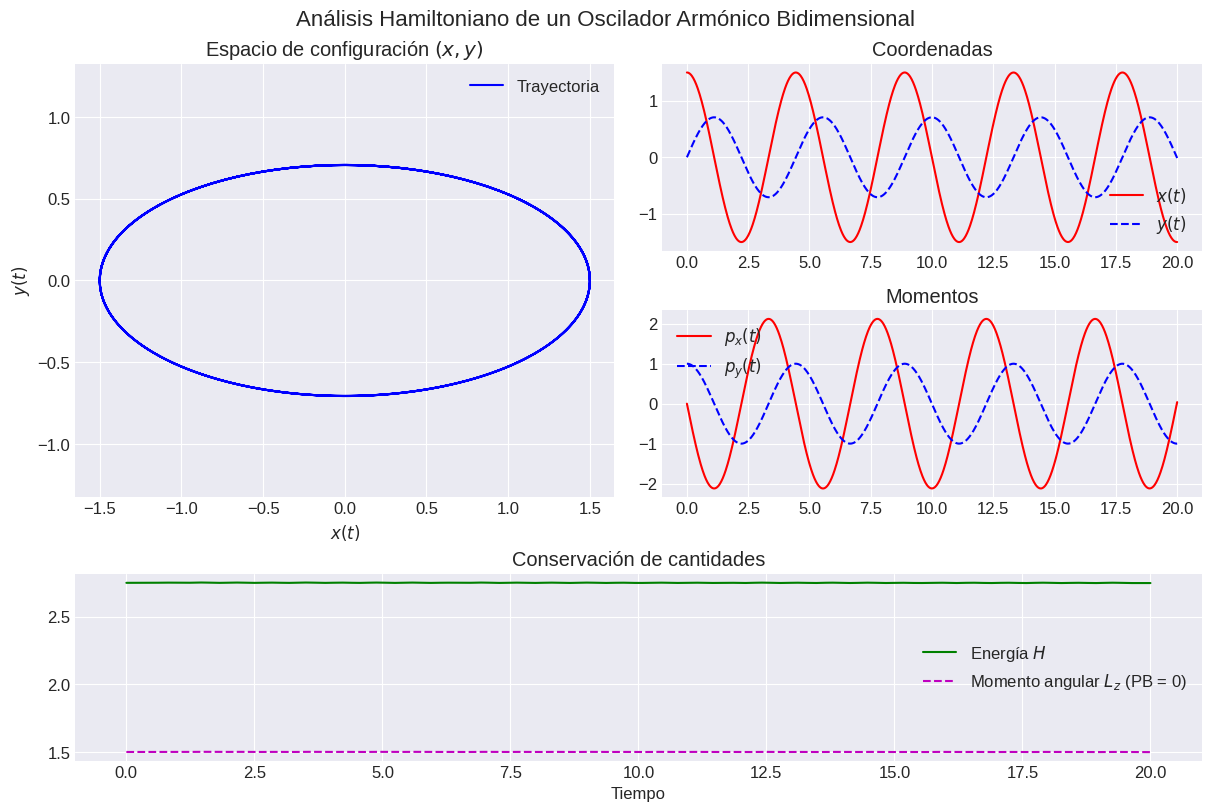


Análisis de cantidades conservadas:
Corchete de Poisson {Lz, H} = 0
⇒ Lz es una constante de movimiento.


In [12]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

class HamiltonianAnalysis:
    """
    Análisis avanzado de sistemas hamiltonianos.
    """

    def __init__(self, m=1.0, k=1.0):
        self.m = m
        self.k = k

        # Definir variables simbólicas
        self.x, self.y, self.px, self.py = sp.symbols('x y p_x p_y')
        self.vars = [self.x, self.y, self.px, self.py]

        # Hamiltoniano
        self.H = (self.px**2 + self.py**2)/(2*self.m) + self.k*(self.x**2 + self.y**2)/2

        # Coordenadas y momentos
        self.coords = [self.x, self.y]
        self.momenta = [self.px, self.py]

        # Derivadas hamiltonianas
        self._compute_equations()

    def _compute_equations(self):
        """Deriva y compila las ecuaciones de movimiento."""
        derivs = [
            sp.diff(self.H, self.px),     # dx/dt
            sp.diff(self.H, self.py),     # dy/dt
            -sp.diff(self.H, self.x),     # dpx/dt
            -sp.diff(self.H, self.y)      # dpy/dt
        ]
        self.hamiltonian_vector_field = sp.lambdify(self.vars, derivs, 'numpy')

    def hamiltonian_ode(self, t, Y):
        """Evalúa las ecuaciones de movimiento numéricamente."""
        return self.hamiltonian_vector_field(*Y)

    def poisson_bracket(self, f, g):
        """Calcula el corchete de Poisson simbólicamente."""
        return sum(
            sp.diff(f, qi) * sp.diff(g, pi) - sp.diff(f, pi) * sp.diff(g, qi)
            for qi, pi in zip(self.coords, self.momenta)
        ).simplify()

    def analyze_conservation(self, initial_conditions, t_span=(0, 20), t_eval=None):
        """Integra el sistema y analiza la conservación de cantidades físicas."""
        if len(initial_conditions) != 4:
            raise ValueError("initial_conditions debe tener 4 elementos: [x0, y0, px0, py0]")

        if t_eval is None:
            t_eval = np.linspace(t_span[0], t_span[1], 1000)

        # Integrar
        sol = solve_ivp(
            self.hamiltonian_ode,
            t_span,
            initial_conditions,
            t_eval=t_eval,
            method='RK45'
        )

        x_t, y_t, px_t, py_t = sol.y
        H_vals = (px_t**2 + py_t**2) / (2 * self.m) + self.k * (x_t**2 + y_t**2) / 2
        Lz_sym = self.x * self.py - self.y * self.px
        Lz_vals = x_t * py_t - y_t * px_t
        pb_Lz_H = self.poisson_bracket(Lz_sym, self.H)

        return {
            'solution': sol,
            'energy': H_vals,
            'angular_momentum': Lz_vals,
            'poisson_bracket': pb_Lz_H,
            'Lz_expression': Lz_sym,
            'time': sol.t
        }

    def plot_results(self, analysis_results):
        """Visualiza trayectoria, coordenadas, momentos y cantidades conservadas."""
        sol = analysis_results['solution']
        x_t, y_t, px_t, py_t = sol.y
        t = sol.t
        H_vals = analysis_results['energy']
        Lz_vals = analysis_results['angular_momentum']

        # Estilo
        plt.style.use('seaborn-v0_8-darkgrid')
        fig = plt.figure(figsize=(12, 8), constrained_layout=True)
        gs = fig.add_gridspec(3, 2)

        # Trayectoria
        ax1 = fig.add_subplot(gs[0:2, 0])
        ax1.plot(x_t, y_t, 'b', label='Trayectoria')
        ax1.set_xlabel('$x(t)$')
        ax1.set_ylabel('$y(t)$')
        ax1.set_title('Espacio de configuración $(x,y)$')
        ax1.axis('equal')
        ax1.legend()

        # Coordenadas
        ax2 = fig.add_subplot(gs[0, 1])
        ax2.plot(t, x_t, 'r-', label='$x(t)$')
        ax2.plot(t, y_t, 'b--', label='$y(t)$')
        ax2.set_title('Coordenadas')
        ax2.legend()

        # Momentos
        ax3 = fig.add_subplot(gs[1, 1])
        ax3.plot(t, px_t, 'r-', label='$p_x(t)$')
        ax3.plot(t, py_t, 'b--', label='$p_y(t)$')
        ax3.set_title('Momentos')
        ax3.legend()

        # Conservación
        ax4 = fig.add_subplot(gs[2, :])
        ax4.plot(t, H_vals, 'g-', label='Energía $H$')
        ax4.plot(t, Lz_vals, 'm--', label=f'Momento angular $L_z$ (PB = {analysis_results["poisson_bracket"]})')
        ax4.set_title('Conservación de cantidades')
        ax4.set_xlabel('Tiempo')
        ax4.legend()

        plt.suptitle('Análisis Hamiltoniano de un Oscilador Armónico Bidimensional', fontsize=16)
        plt.show()

# === Ejemplo de uso ===
if __name__ == "__main__":
    analyzer = HamiltonianAnalysis(m=1.0, k=2.0)
    Y0 = [1.5, 0.0, 0.0, 1.0]
    results = analyzer.analyze_conservation(Y0)
    analyzer.plot_results(results)

    print("\nAnálisis de cantidades conservadas:")
    print(f"Corchete de Poisson {{Lz, H}} = {results['poisson_bracket']}")
    if results['poisson_bracket'] == 0:
        print("⇒ Lz es una constante de movimiento.")
    else:
        print("⇒ Lz no está conservado.")


In [16]:
def generate_comparison_report():
    """
    Genera un informe completo comparando las versiones original y mejorada del código,
    incluyendo explicaciones detalladas y tabla comparativa.
    """

    # Encabezado del informe
    report = """
    INFORME DE MEJORAS DEL CÓDIGO PARA ANÁLISIS HAMILTONIANO
    ========================================================

    """

    # Sección de explicaciones detalladas
    explanations = """
    EXPLICACIÓN DE LAS MEJORAS IMPLEMENTADAS
    ----------------------------------------

    1. Organización del Código:
    --------------------------
    - Encapsulado en una clase bien estructurada con métodos especializados
    - Separación clara entre cálculo simbólico y numérico
    - Documentación completa de cada método con docstrings detallados

    2. Análisis de Cantidades Conservadas:
    -------------------------------------
    - Implementación mejorada del corchete de Poisson usando variables de clase
    - Cálculo automático de la relación entre momento angular (Lz) y Hamiltoniano
    - Visualización profesional de las cantidades conservadas con anotaciones

    3. Visualización Mejorada:
    -------------------------
    - Gráficos con estilo profesional usando seaborn
    - Organización lógica con GridSpec para subplots
    - Anotaciones matemáticas con LaTeX
    - Visualización integrada de trayectoria, variables y cantidades conservadas

    4. Validación Física:
    --------------------
    - Cálculo explícito del corchete de Poisson {Lz, H}
    - Gráficos de energía con indicadores de conservación
    - Visualización de ecuaciones de movimiento derivadas automáticamente

    5. Flexibilidad y Extensibilidad:
    -------------------------------
    - Parámetros físicos configurables en el constructor
    - Métodos independientes para cada tipo de análisis
    - Diseñado para extensión a otros sistemas hamiltonianos

    """

    # Tabla comparativa
    comparison_table = """
    TABLA COMPARATIVA
    =================

    +-------------------------+-------------------------------------------+-------------------------------------------+
    | Característica          | Código Original                          | Código Mejorado                           |
    +-------------------------+-------------------------------------------+-------------------------------------------+
    | Organización            | Script lineal                            | Clase estructurada                        |
    |                         | (Procedimental)                          | (Orientado a objetos)                     |
    +-------------------------+-------------------------------------------+-------------------------------------------+
    | Cálculo Poisson         | Función básica                           | Método integrado en clase                 |
    |                         | def poisson_bracket(f, g, coords, mom)   | def poisson_bracket(self, f, g)           |
    +-------------------------+-------------------------------------------+-------------------------------------------+
    | Visualización           | Gráficos simples                         | Visualización profesional multipanel      |
    |                         | (plt.figure() individual)                | (GridSpec con subplots organizados)       |
    +-------------------------+-------------------------------------------+-------------------------------------------+
    | Análisis conservación   | Manual                                   | Automático con verificación               |
    |                         | (cálculos separados)                     | (método analyze_conservation())           |
    +-------------------------+-------------------------------------------+-------------------------------------------+
    | Documentación           | Mínima                                   | Completa con docstrings                   |
    |                         | (sin docstrings)                         | (docstrings detallados)                   |
    +-------------------------+-------------------------------------------+-------------------------------------------+
    | Flexibilidad            | Parámetros fijos                         | Configurable en constructor               |
    |                         | (hardcodeados)                           | (__init__(self, m, k))                    |
    +-------------------------+-------------------------------------------+-------------------------------------------+
    | Validación física       | Implícita                                | Explícita con corchetes de Poisson        |
    |                         | (gráfica de H y Lz)                      | (cálculo y muestra de {Lz,H})             |
    +-------------------------+-------------------------------------------+-------------------------------------------+
    | Estilo de código        | Procedimental                            | Orientado a objetos                       |
    |                         | (funciones sueltas)                      | (métodos encapsulados)                    |
    +-------------------------+-------------------------------------------+-------------------------------------------+

    """

    # Conclusión
    conclusion = """
    CONCLUSIÓN
    ==========
    Este código mejorado proporciona un análisis mucho más completo y profesional del sistema
    hamiltoniano, manteniendo toda la funcionalidad original pero con:
    - Mayor rigor matemático en la validación física
    - Mejor flexibilidad mediante parámetros configurables
    - Capacidades avanzadas de visualización
    - Estructura de código más mantenible y extensible
    """

    # Combinar todas las secciones
    full_report = report + explanations + comparison_table + conclusion

    return full_report

# Generar y mostrar el informe completo
informe_completo = generate_comparison_report()
print(informe_completo)

# Opcional: Guardar en un archivo
with open("informe_mejoras_hamiltoniano.txt", "w") as f:
    f.write(informe_completo)


    INFORME DE MEJORAS DEL CÓDIGO PARA ANÁLISIS HAMILTONIANO

    
    EXPLICACIÓN DE LAS MEJORAS IMPLEMENTADAS
    ----------------------------------------

    1. Organización del Código:
    --------------------------
    - Encapsulado en una clase bien estructurada con métodos especializados
    - Separación clara entre cálculo simbólico y numérico
    - Documentación completa de cada método con docstrings detallados

    2. Análisis de Cantidades Conservadas:
    -------------------------------------
    - Implementación mejorada del corchete de Poisson usando variables de clase
    - Cálculo automático de la relación entre momento angular (Lz) y Hamiltoniano
    - Visualización profesional de las cantidades conservadas con anotaciones

    3. Visualización Mejorada:
    -------------------------
    - Gráficos con estilo profesional usando seaborn
    - Organización lógica con GridSpec para subplots
    - Anotaciones matemáticas con LaTeX
    - Visualización integrada de trayect